In [0]:
from fastai import *
from fastai.vision import *

In [4]:
untar_data(URLs.IMAGENETTE_160)

PosixPath('/root/.fastai/data/imagenette2-160')

In [0]:
import matplotlib.pyplot as plt

In [0]:
img = plt.imread('/root/.fastai/data/imagenette2-160/train/n01440764/n01440764_13464.JPEG')

In [7]:
img.shape

(160, 178, 3)

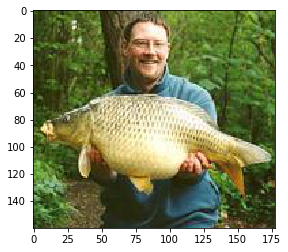

In [8]:
plt.imshow(img)

## 1. Creating my custom ItemList

In [0]:
#create a 30x30 black window in the image
window_size = 30
row_init = np.random.randint(0,img.shape[0]-window_size)
col_init = np.random.randint(0,img.shape[1]-window_size)

img_window = img.copy()
img_window[row_init:row_init+window_size,col_init:col_init+window_size,:] = 0

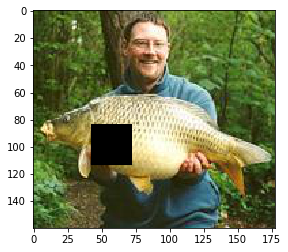

In [10]:
plt.imshow(img_window)

In [0]:
img = open_image('/root/.fastai/data/imagenette2-160/train/n01440764/n01440764_13464.JPEG')

In [12]:
!ls '/root/.fastai/data/imagenette2-160'

train  val


In [0]:
#create a 30x30 black window in the image
window_size = 30
row_init = np.random.randint(0,img.shape[1]-window_size)
col_init = np.random.randint(0,img.shape[2]-window_size)

img_window = img.data.clone()
img_window[:,row_init:row_init+window_size,col_init:col_init+window_size] = 0

In [14]:
row_init, col_init

(111, 23)

In [0]:
img_window = img.data.clone()

In [0]:
#img_window[0,15:45,146:176] = 0
#img_window[1,15:45,146:176] = 0
#img_window[2,15:45,146:176] = 0
img_window[:,15:45,146:176] = 0

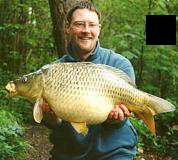

In [17]:
Image(img_window)

In [0]:
t = img.data

In [19]:
type(t)

torch.Tensor

In [0]:
img = open_image('/root/.fastai/data/imagenette2-160/train/n01440764/n01440764_13464.JPEG')
class CustomItemBase(ItemBase):
    def __init__(self, img):
        self.img = img
        self.obj = self.img
        self.window_size = 30
        self.data = None
        self.row_init = np.random.randint(0,self.img.data.shape[1]-self.window_size)
        self.col_init = np.random.randint(0,self.img.data.shape[2]-self.window_size)
        self.create_input()

    def create_input(self):
        
        #import pdb;pdb.set_trace()
        #target = self.img.data[:,self.row_init:self.row_init+self.window_size,self.col_init:self.col_init+self.window_size]
        img_window = self.img.data.clone()
        img_window[:,self.row_init:self.row_init+self.window_size,self.col_init:self.col_init+self.window_size] = 0
        #import pdb;pdb.set_trace()
        self.data = img_window/255

    def apply_tfms(self,tfms, **kwargs):
        self.img = self.img.apply_tfms(tfms, **kwargs)
        self.create_input()

    def to_one(self): return Image(self.data*255)

    def show(self): return Image(self.data*255)

In [0]:
class TargetList(ItemList):
    def reconstruct(self, t:Tensor): 
        import pdb; pdb.set_trace()

In [0]:
class CustomItemList(ItemList):
    _label_cls=TargetList
    def __init__(self,items, **kwargs):
        super().__init__(items, **kwargs)
        #self.itemsB = itemsB
        #self.copy_new.append('itemsB')

    def get(self, i):
        fn = super().get(i)
        #import pdb;pdb.set_trace()
        res = self.open(fn)
        return CustomItemBase(res)

    def open(self, fn): return open_image(fn)

    @classmethod
    def from_folders(cls, path, **kwargs):
        res = super().from_folder(path, **kwargs)
        res.path = path
        return res

In [28]:
!ls /root/.fastai/data/imagenette2-160

train  val


In [0]:
data = ImageDataBunch.from_folder(path='/root/.fastai/data/imagenette2-160',valid='val',size=224)

In [0]:
cil = CustomItemList.from_folder('/root/.fastai/data/imagenette2-160/val')

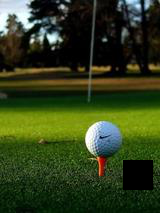

In [96]:
cil.get(100).show()

In [0]:
def label_function(x):
    import pdb;pdb.set_trace()
    target = x.img.data[:,x.row_init:x.row_init+x.window_size,x.col_init:x.col_init+x.window_size]
    return target

In [108]:
data = (CustomItemList.from_folder('/root/.fastai/data/imagenette2-160/val').
        split_by_rand_pct().
        get_label_cls(labels=None, label_cls=TargetList))

AssertionError: ignored

In [0]:
data = (ImageList.from_folder('/root/.fastai/data/imagenette2-160').
        split_by_rand_pct().
        label_from_func())